# Exploratory Data Analysis of IMDb Movies of Indian Cinema

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from collections import Counter

In [2]:
# Load the dataset
df = pd.read_csv("IMDb Movies India.csv",encoding='latin-1')
df.head() #Display the 1st five rows of the DataFrame to inspect the data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.duplicated().sum()

6

In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df1=df.copy()
#Checking duplicate available for Name column
df1.duplicated(subset='Name').value_counts()

False    13838
True      1671
dtype: int64

In [11]:
df1.drop_duplicates(subset='Name',inplace=True)
df1.duplicated().value_counts()

False    13838
dtype: int64

- We have duplicate values for movie name. We will remove them.

In [12]:
#Droppig first row from the dataset as there is no name available for the movie
df1.drop(df.index[0])

#Resetting the index
df1.set_index(np.arange(len(df1)),inplace=True)

In [13]:
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [15]:
df.isnull().sum().sort_values(ascending=False)/len(df1) #checking Percentage of null values

Duration    0.597557
Rating      0.548490
Votes       0.548417
Actor 3     0.227200
Actor 2     0.172279
Genre       0.135641
Actor 1     0.116852
Year        0.038156
Director    0.037939
Name        0.000000
dtype: float64

In [16]:
#Dropping columns which has more than 50% missing values
print('Null Values in Year Column',df1['Year'].isnull().sum())
print('Null Values in Genre Column',df1['Genre'].isnull().sum())
df1.dropna(subset=['Year'],inplace=True)
df1.dropna(subset=['Genre'],inplace=True)
print('Null Values in Year Column',df1['Year'].isnull().sum())
print('Null Values in Genre Column',df1['Genre'].isnull().sum())

Null Values in Year Column 498
Null Values in Genre Column 1590
Null Values in Year Column 0
Null Values in Genre Column 0


In [17]:
#Changing data types of numeric columns
df1['Duration']= df1['Duration'].str.replace('min','').apply(pd.to_numeric)
df1["Votes"]=df1["Votes"].replace("$5.16M", 516)
df1["Votes"] = pd.to_numeric(df1['Votes'].str.replace(',',''))

In [18]:
df1['Year'] = df1['Year'].str.replace('(','').str.replace(')','')

In [19]:
df1.isnull().sum()

Name           0
Year           0
Duration    5455
Genre          0
Rating      4716
Votes       4716
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

In [21]:
#Replacing missing values
#replacing null values with the most common rating given to an Indian Movie
df1['Rating'].fillna(df1['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of a movie in India
df1['Duration'].fillna(df1['Duration'].mean(),inplace=True)

#replacing null values with average votes recived by a Movie
df1['Votes'].fillna(df1['Votes'].mean(),inplace=True)

In [22]:
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",6.2,2033.216641,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,6.2,2033.216641,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


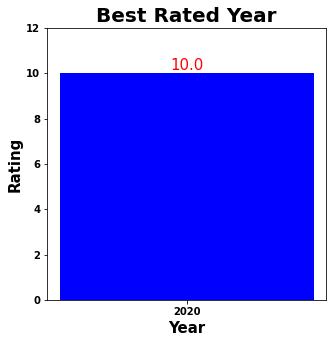

In [25]:
# Best Rate Ever Given to an Indian Movie
best_rating=df1[['Year','Rating']].sort_values(by='Rating',ascending=False).head(1)


#Plotting Bar Graph
fig=plt.figure(figsize=(5,5))
bars=plt.bar(x='Year',height='Rating',data=best_rating,color='blue')

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Best Rated Year",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting the labels for Bars for better visualization
for ele in bars:
    plt.text(ele.get_x()+(ele.get_width()/2),ele.get_y()+ele.get_height(),ele.get_height(),color='Red',ha='center',
             va='bottom',fontsize=15)

- We can cleary see that in Year 2020 an Indian movie recieved 10.0 points on IMDB.

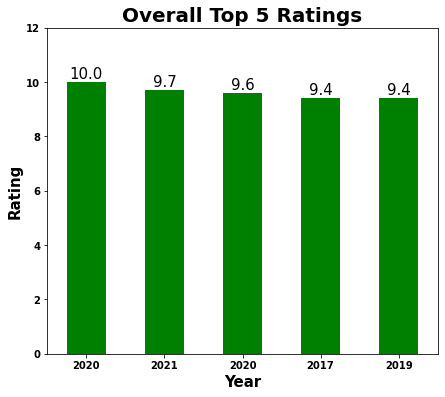

In [27]:
#Overall Top 5 Ratings Given
top5_rating=df1[['Year','Rating']].sort_values(by='Rating',ascending=False).head()

#Plotting Bar Graph
bars=top5_rating.plot(kind='bar',x='Year',y='Rating',color='Green',legend=None,figsize=(7,6))

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Overall Top 5 Ratings",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting Labels for bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(),'.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

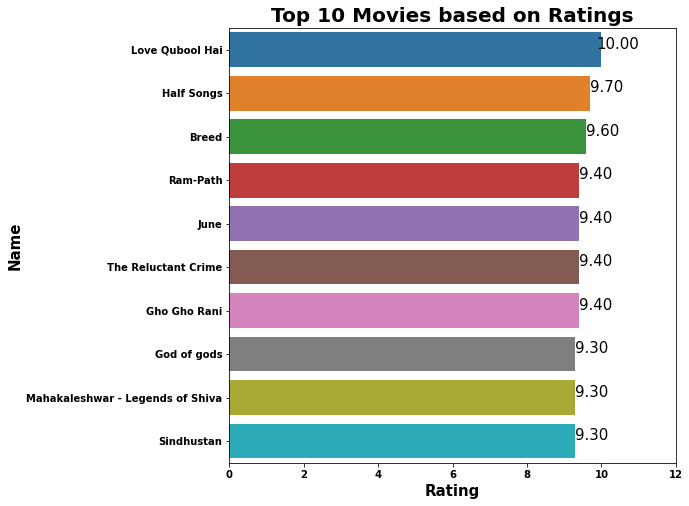

In [28]:
# Top 10 Movies According to Ratings
plt.figure(figsize=(8, 8))

#Dropping the index where Year is 2022,as 2022 is in future
dframe= df1.set_index('Year')
dframe.drop(index='2022',inplace=True)

#sorting Name and Rating by Rating then selecting top 10
top_movies= dframe[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

#Plotting Bar chart
plots = sns.barplot(x="Rating", y="Name", data=top_movies)
  

#Plotting Labels for bars
for bar in plots.patches:
    
    plots.annotate(format(bar.get_width(),'.2f'), 
                   (bar.get_x() + bar.get_width()+0.3, 
                    bar.get_y()+0.5), ha='center', va='center',
                   size=15, xytext=(5,10),
                   textcoords='offset points')

    
plt.xlabel("Rating",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Movies based on Ratings",fontsize=20,fontweight='bold')

plt.xticks(np.arange(0,13,2),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

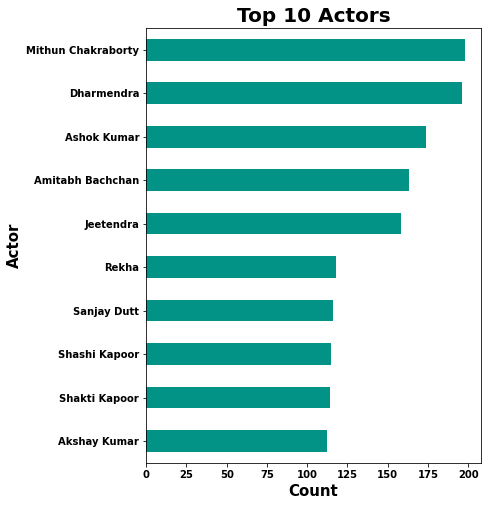

In [29]:
# Top 10 Actors Who appears in most of the movies
Actor1=df1['Actor 1']
Actor2=df1['Actor 2']
Actor3=df1['Actor 3']

#Concatinating the series in one series
Actors = pd.concat([Actor1,Actor2,Actor3])

#sorting series by counts then selecting top 10
frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)

#Plotting Bar graph
frequent_actor.sort_values().plot(kind='barh',color='#029386',figsize=(6,8))

plt.title('Top 10 Actors',fontweight='bold',fontsize=20)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Actor',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

- Mithun Chakraborty appears in most of the movies

In [30]:
# Top 10 Genres for an Indian Movie
from collections import Counter

#creating series for Genre column
Genre=dframe['Genre']

#initializing counter object
Genre_counter=Counter()

#splitting the values if one row contain more than two values
for response in Genre:
    Genre_counter.update(response.split(','))
    
#Printing the top 10 values with occured most of the time
print(Genre_counter.most_common(10))

#Creating List to store the Counter values
Genres=[]
frequency=[]

for items in Genre_counter.most_common(10):
    Genres.append(items[0])
    frequency.append(items[1])

    
#As Drama Appears more than twice in the List
Genres.pop(2)
frequency.pop(2)

[('Drama', 3836), ('Action', 2979), (' Drama', 2426), (' Romance', 1483), ('Comedy', 1408), (' Thriller', 777), (' Crime', 765), ('Thriller', 698), (' Family', 658), ('Romance', 653)]


2426

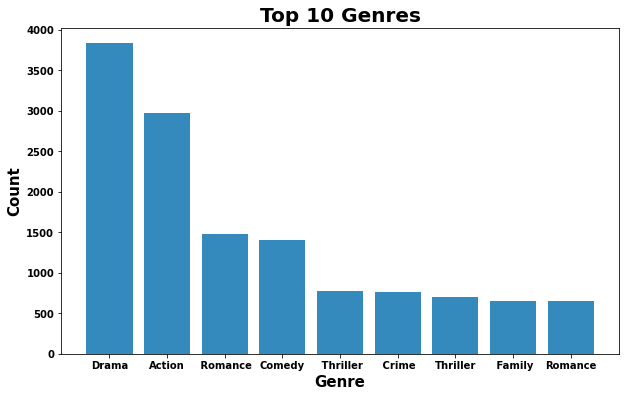

In [31]:
fig= plt.figure(figsize=(10,6))
plt.bar(Genres,frequency,color='#348ABD')
plt.title('Top 10 Genres',fontweight='bold',fontsize=20)
plt.xlabel('Genre',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',rotation=0)
plt.yticks(fontweight='bold')
plt.show()

- In India Most of the movies are of Drama and Action Genres.

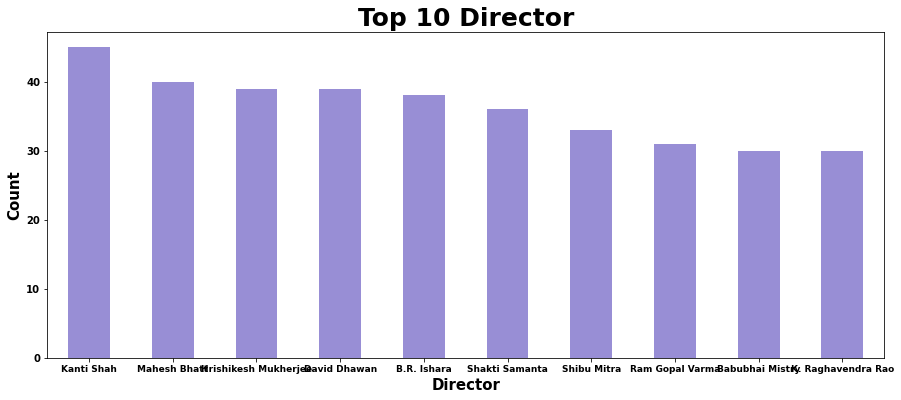

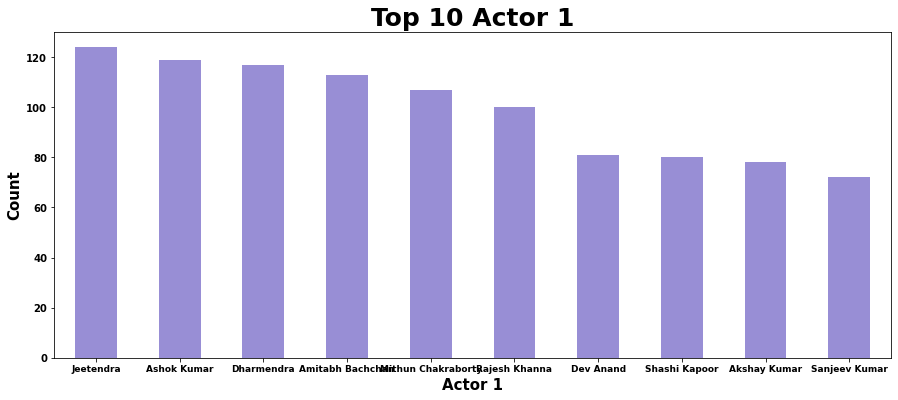

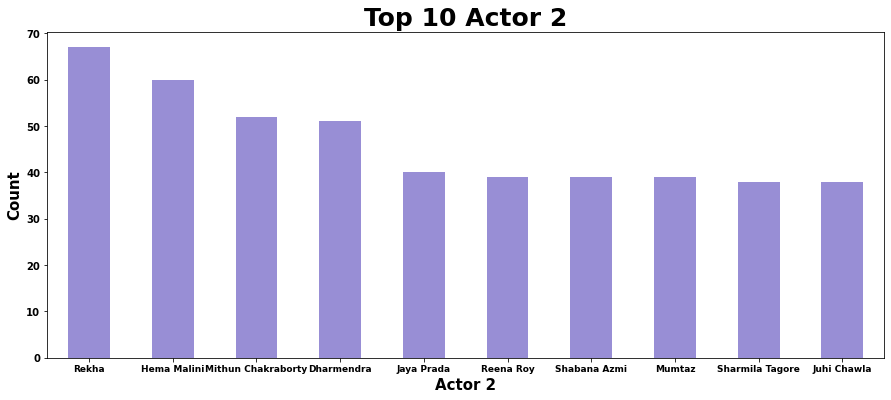

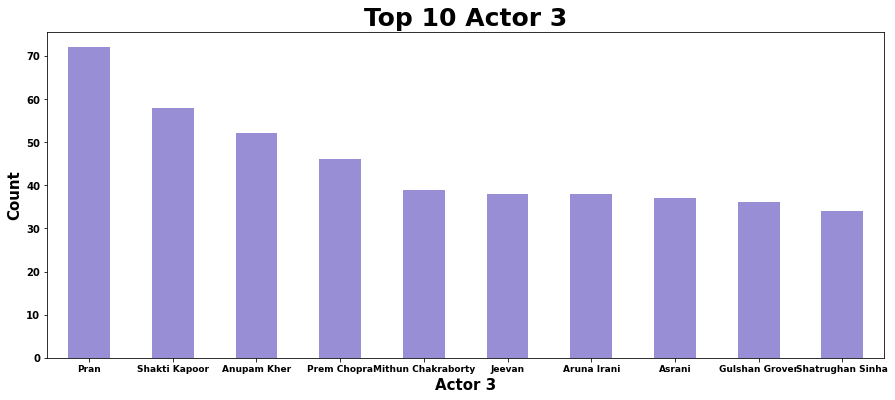

In [32]:
# Top 10 Directors,Actor1,Actor2 and Actor3
def top10(column):
    global dframe
    dframe[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                            figsize=(15,6),color='#988ED5')
    
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    plt.xticks(rotation=0,fontsize=9,fontweight='bold')
    plt.yticks(fontsize=10,fontweight='bold')
    plt.show()

cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(items)

In [33]:
# Distribution of Rating,Duration,Released_Year and Votes
def distribution(column):
    global dframe
    fig=plt.figure(figsize=(8,6))
    sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)
    plt.xlabel(column,fontweight='bold',fontsize=15)
    plt.ylabel('Density',fontweight='bold',fontsize=15)
    plt.title('Distribution of {}'.format(column),fontweight='bold',fontsize=20)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()
    
dframe['Released_Year']= dframe.index.astype('int64')

<Figure size 576x432 with 0 Axes>

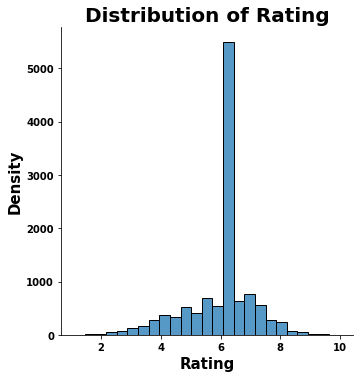

<Figure size 576x432 with 0 Axes>

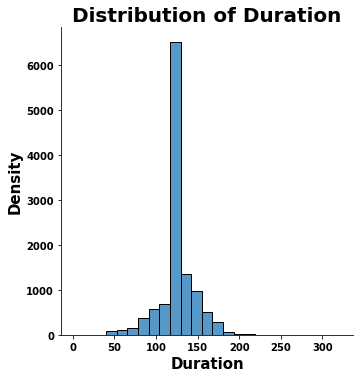

<Figure size 576x432 with 0 Axes>

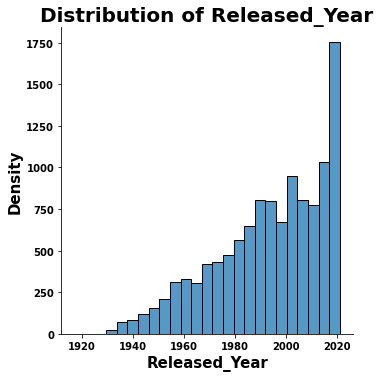

<Figure size 576x432 with 0 Axes>

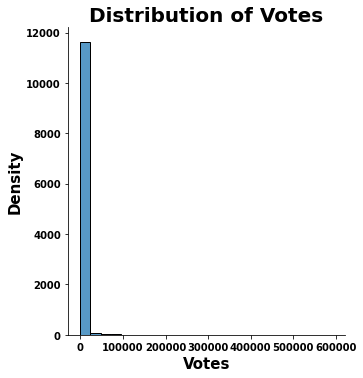

In [34]:
lis=['Rating','Duration','Released_Year','Votes']
i=0
while i< len(lis):
    distribution(lis[i])
    i+=1

<AxesSubplot:>

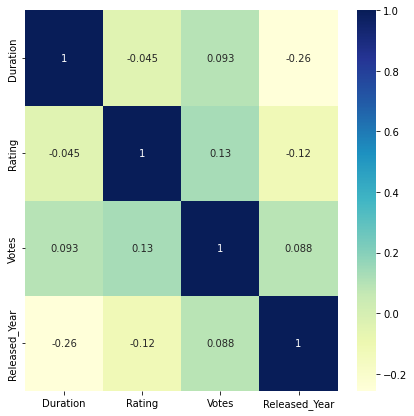

In [35]:
# Correlation between the Varibles
fig= plt.figure(figsize=(7,7))
sns.heatmap(dframe.corr(), cmap="YlGnBu", annot=True)

- We don't see any correlation between the variables